Stock Data Ingest
===

In [1]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [76]:
import numpy as np
import pandas
import mystyle
import chart
import data

In [3]:
# symbols = ["AAPL", "TSLA", "NVDA", "BIDU", "AMZN", "BABA", "NFLX", "MSFT"]
symbols = ["AAPL", "TSLA"]

In [64]:
# Get stock data
N = 90
# stock = data.get_from_net(None, days = 1300)

Loading live data from 2013-04-19 to 2018-12-29 ...


In [65]:
# data.save_to_folder(stock)

In [74]:
quotes = data.get_from_files(symbols)
quotes.tail()

Loading offline data from 2013-10-30 to 2018-12-28 ...


Attributes   close            high               low             open          \
Symbols       AAPL    TSLA    AAPL      TSLA    AAPL     TSLA    AAPL    TSLA   
date                                                                            
2018-12-21  156.86  317.40  158.16  323.4700  149.63  312.440  150.73  319.77   
2018-12-24  148.15  313.50  151.55  314.5000  146.59  295.195  146.83  295.39   
2018-12-26  148.30  300.00  157.23  326.9700  146.72  294.090  157.17  326.09   
2018-12-27  155.84  319.84  156.77  322.1717  150.07  301.500  156.15  316.13   
2018-12-28  157.50  323.10  158.52  336.2400  154.55  318.410  156.23  333.87   

Attributes      volume             
Symbols           AAPL       TSLA  
date                               
2018-12-21  95744384.0  8016801.0  
2018-12-24  37169232.0  5559913.0  
2018-12-26  58582544.0  8163138.0  
2018-12-27  53117065.0  8575133.0  
2018-12-28  42291424.0  9938992.0

## Building a DataFrame

In [77]:
dd = np.arange(20)
print(dd)
dd = np.reshape(dd, (2, -1))
print(dd)
iterables = [['open', 'high', 'low', 'close', 'volume'], ['AAPL', 'TSLA']]
d = pandas.DataFrame(dd, columns = pandas.MultiIndex.from_product(iterables, names = ['Attributes', 'Symbols']))
d.head()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]]


Attributes open      high       low      close      volume     
Symbols    AAPL TSLA AAPL TSLA AAPL TSLA  AAPL TSLA   AAPL TSLA
0             0    1    2    3    4    5     6    7      8    9
1            10   11   12   13   14   15    16   17     18   19

In [80]:
# Compute normalized gain
stock_return = stock['close'].apply(lambda x: x / x[-1])
# Compute delta
stock_delta = stock['close'].apply(lambda x: np.log(x) - np.log(x.shift(1)))

## Plotting One Symbol

In [82]:
sym = 'TSLA'
dat = data.get_symbol_frame(quotes, sym)

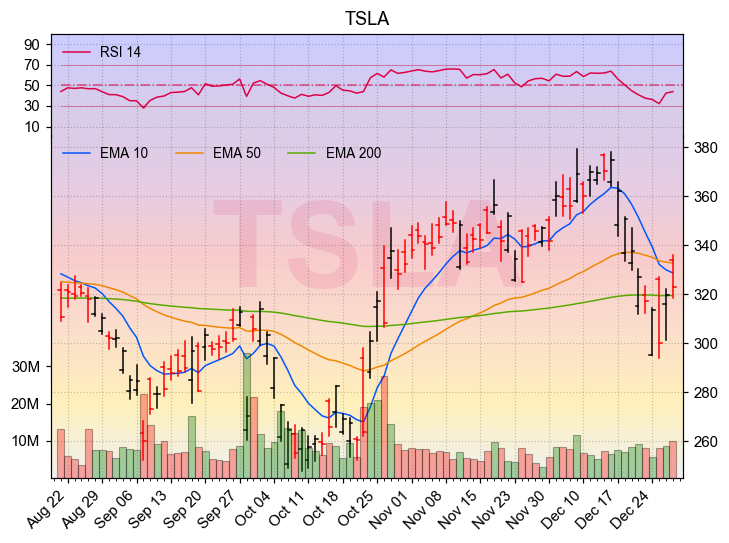

In [83]:
fig = chart.Chart(N, dat)

In [ ]:
sym = 'TSLA'
sub = stock.loc[pd.IndexSlice[:], (slice(None), sym)]
sub.columns

In [ ]:
df = pd.read_pickle('data/TSLA.pkl')
df.columns

In [ ]:
df = pd.read_pickle('data/AAPL.pkl')
df.columns